# Data Exploration
This notebook is used to explore the dataset by checking the distribution of each parameter and structure of the dataset

In [46]:

from datasets import load_dataset, load_from_disk
import pandas as pd
import matplotlib.pyplot as plt

## Inspect Base Dataset Information

In [47]:
download_dataset = load_dataset("neo4j/text2cypher-2025v1")
download_dataset.save_to_disk("dataset/text2cypher_2025v1")

Saving the dataset (1/1 shards): 100%|██████████| 4438/4438 [00:00<00:00, 75245.86 examples/s]


In [48]:
dataset = load_from_disk("dataset/text2cypher_2025v1")

In [49]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['question', 'schema', 'cypher', 'data_source', 'instance_id', 'database_reference_alias'],
        num_rows: 35946
    })
    test: Dataset({
        features: ['question', 'schema', 'cypher', 'data_source', 'instance_id', 'database_reference_alias'],
        num_rows: 4438
    })
})


In [50]:
print(dataset['train'][0])

{'question': 'Which 3 countries have the most entities linked as beneficiaries in filings?', 'schema': 'Node properties:\n- **Country**\n  - `location`: POINT \n  - `code`: STRING Example: "AFG"\n  - `name`: STRING Example: "Afghanistan"\n  - `tld`: STRING Example: "AF"\n- **Filing**\n  - `begin`: DATE_TIME Min: 2000-02-08T00:00:00Z, Max: 2017-09-05T00:00:00Z\n  - `end`: DATE_TIME Min: 2000-02-08T00:00:00Z, Max: 2017-11-03T00:00:00Z\n  - `originator_bank_id`: STRING Example: "cimb-bank-berhad"\n  - `sar_id`: STRING Example: "3297"\n  - `beneficiary_bank`: STRING Example: "Barclays Bank Plc"\n  - `filer_org_name_id`: STRING Example: "the-bank-of-new-york-mellon-corp"\n  - `originator_bank_country`: STRING Example: "Singapore"\n  - `beneficiary_bank_country`: STRING Example: "United Kingdom"\n  - `filer_org_name`: STRING Example: "The Bank of New York Mellon Corp."\n  - `originator_iso`: STRING Example: "SGP"\n  - `beneficiary_bank_id`: STRING Example: "barclays-bank-plc-london-england-g

In [51]:
print(dataset['train'][0]['question'])
print(dataset['train'][0]['schema'])


Which 3 countries have the most entities linked as beneficiaries in filings?
Node properties:
- **Country**
  - `location`: POINT 
  - `code`: STRING Example: "AFG"
  - `name`: STRING Example: "Afghanistan"
  - `tld`: STRING Example: "AF"
- **Filing**
  - `begin`: DATE_TIME Min: 2000-02-08T00:00:00Z, Max: 2017-09-05T00:00:00Z
  - `end`: DATE_TIME Min: 2000-02-08T00:00:00Z, Max: 2017-11-03T00:00:00Z
  - `originator_bank_id`: STRING Example: "cimb-bank-berhad"
  - `sar_id`: STRING Example: "3297"
  - `beneficiary_bank`: STRING Example: "Barclays Bank Plc"
  - `filer_org_name_id`: STRING Example: "the-bank-of-new-york-mellon-corp"
  - `originator_bank_country`: STRING Example: "Singapore"
  - `beneficiary_bank_country`: STRING Example: "United Kingdom"
  - `filer_org_name`: STRING Example: "The Bank of New York Mellon Corp."
  - `originator_iso`: STRING Example: "SGP"
  - `beneficiary_bank_id`: STRING Example: "barclays-bank-plc-london-england-gbr"
  - `origin_lat`: STRING Example: "1.366

In [52]:
print(dataset['train'][0]['cypher'])
print(dataset['train'][0]['data_source'])
print(dataset['train'][0]['instance_id'])
print(dataset['train'][0]['database_reference_alias'])

MATCH (f:Filing)-[:BENEFITS]->(e:Entity)-[:COUNTRY]->(c:Country)\nWITH c.name AS country, COUNT(e) AS entityCount\nORDER BY entityCount DESC\nLIMIT 3\nRETURN country, entityCount
neo4jLabs_synthetic_gpt4o
instance_id_41185
neo4jlabs_demo_db_fincen


## Generate Chart Information

In [53]:
dfs = []
for split in dataset.keys():
    df = pd.DataFrame(dataset[split])
    df["split"] = split
    dfs.append(df)

full_df = pd.concat(dfs)

split_counts = full_df["split"].value_counts()
data_source_counts = full_df["data_source"].value_counts().head(10)
instance_id_counts = full_df["instance_id"].value_counts().head(10)
database_ref_counts = full_df["database_reference_alias"].value_counts().head(10)

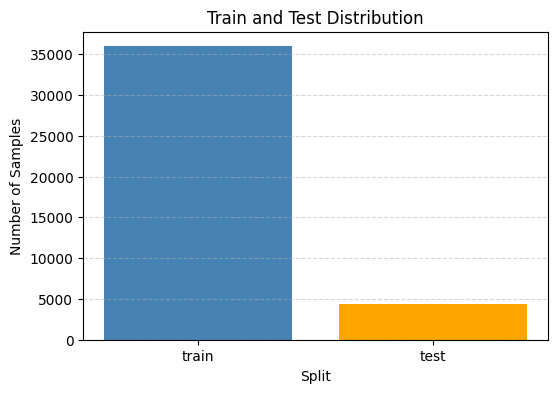

In [54]:
plt.figure(figsize=(6, 4))
plt.bar(split_counts.index, split_counts.values, color=['steelblue', 'orange'])
plt.title("Train and Test Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Split")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("./docs/data_split_distribution.png", dpi=300, bbox_inches="tight")

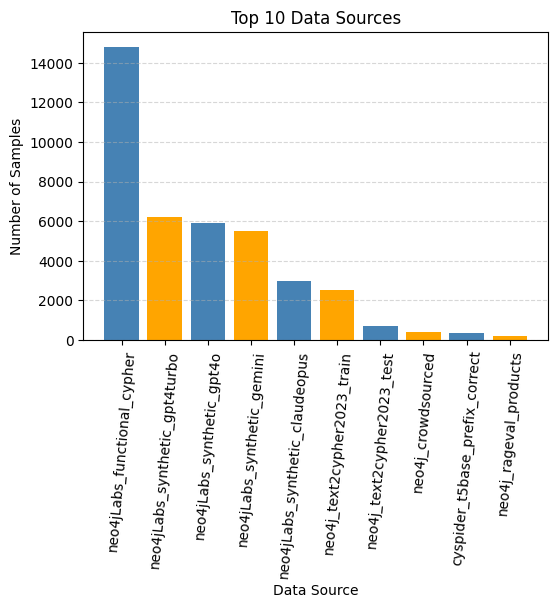

In [55]:
plt.figure(figsize=(6, 4))
plt.bar(data_source_counts.index, data_source_counts.values, color=['steelblue', 'orange'])
plt.title("Top 10 Data Sources")
plt.ylabel("Number of Samples")
plt.xlabel("Data Source")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tick_params(axis='x', rotation=85)
plt.savefig("./docs/data_source_distribution.png", dpi=300, bbox_inches="tight")

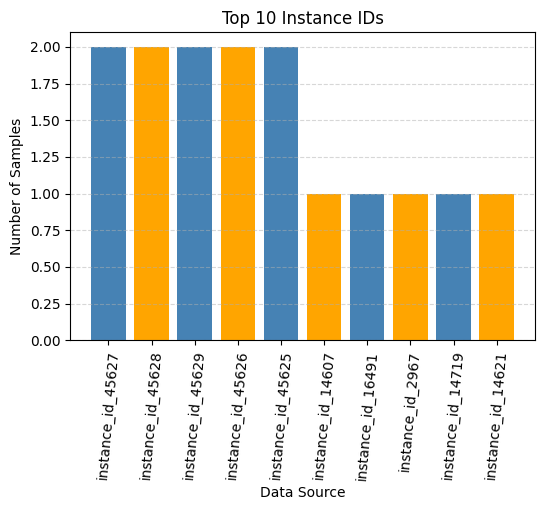

In [56]:
plt.figure(figsize=(6, 4))
plt.bar(instance_id_counts.index, instance_id_counts.values, color=['steelblue', 'orange'])
plt.title("Top 10 Instance IDs")
plt.ylabel("Number of Samples")
plt.xlabel("Data Source")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tick_params(axis='x', rotation=85)
plt.savefig("./docs/data_instance_distribution.png", dpi=300, bbox_inches="tight")

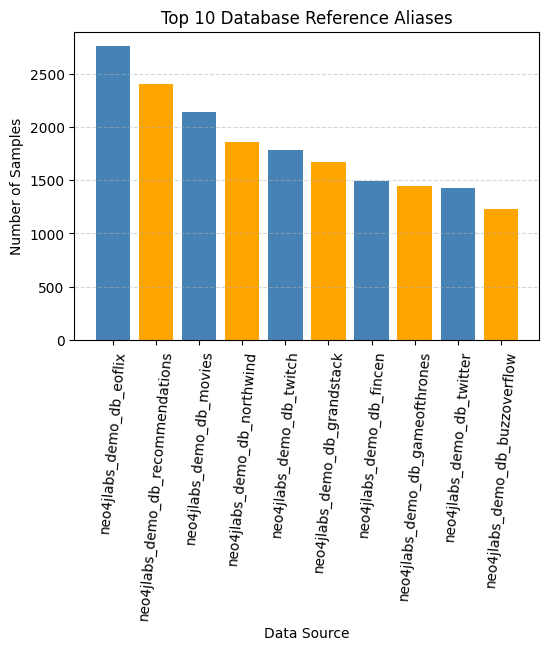

In [57]:
plt.figure(figsize=(6, 4))
plt.bar(database_ref_counts.index, database_ref_counts.values, color=['steelblue', 'orange'])
plt.title("Top 10 Database Reference Aliases")
plt.ylabel("Number of Samples")
plt.xlabel("Data Source")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tick_params(axis='x', rotation=85)
plt.savefig("./docs/data_reference_distribution.png", dpi=300, bbox_inches="tight")